In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
import warnings as i
i.filterwarnings('ignore')

In [2]:
#reading data

df = pd.read_csv('/Users/priya/Desktop/MYLAPIDOCS/Tech/KrishNaik/HeartDiseasePrediction/dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#check for null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#checking for any imbalances in data
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

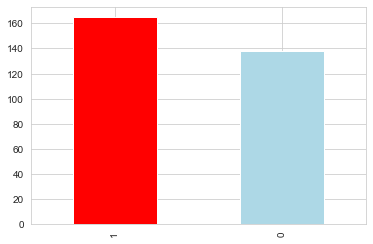

In [6]:
#plotting the same
df.target.value_counts().plot(kind="bar",color=['red','lightblue']);

In [7]:
#differentiating categorical cols & continuous cols
categorical=[]
continuous=[]
for col in df.columns:
    print("--------------------------->")
    print(f"{col} : {df[col].unique()}")
    if len(df[col].unique()) <= 10:
        categorical.append(col)
    else:
        continuous.append(col)

--------------------------->
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------------->
sex : [1 0]
--------------------------->
cp : [3 2 1 0]
--------------------------->
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------------->
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172

In [8]:
#categorical columns:
categorical

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [9]:
#continuous columns:
continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

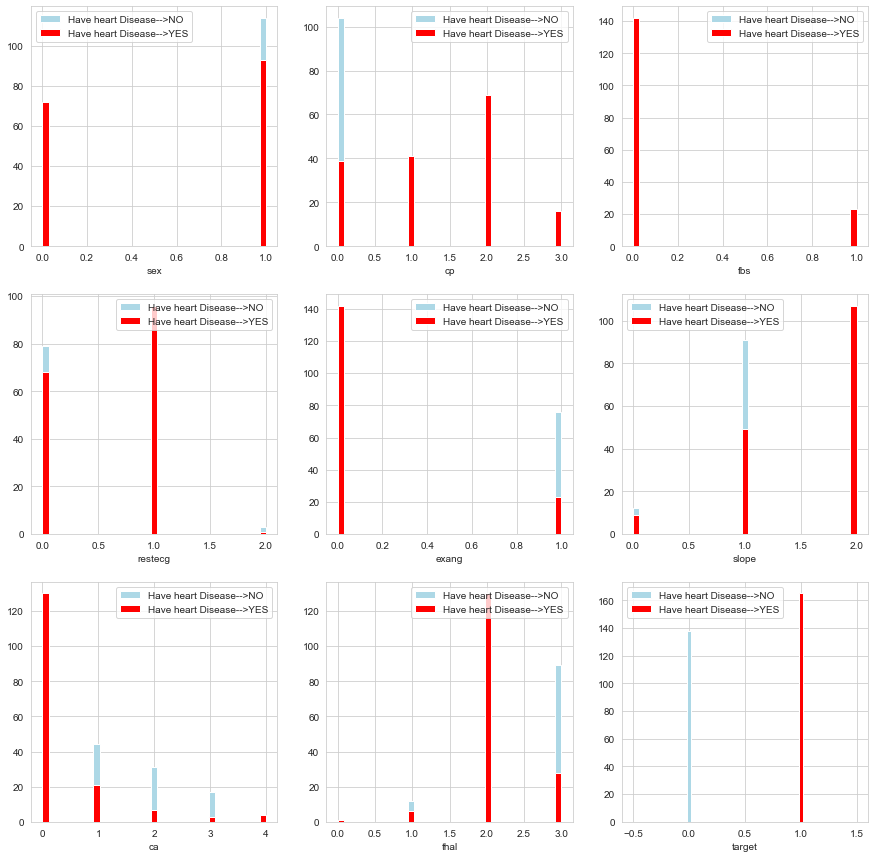

In [10]:
#plotting target with categorical cols
plt.figure(figsize=(15, 15))

for i,col in enumerate(categorical, 1):
    plt.subplot(3,3,i)
    df[df['target']==0][col].hist(bins=35,color='lightblue',label='Have heart Disease-->NO')
    df[df['target']==1][col].hist(bins=35,color='red',label='Have heart Disease-->YES')
    plt.legend()
    plt.xlabel(col)

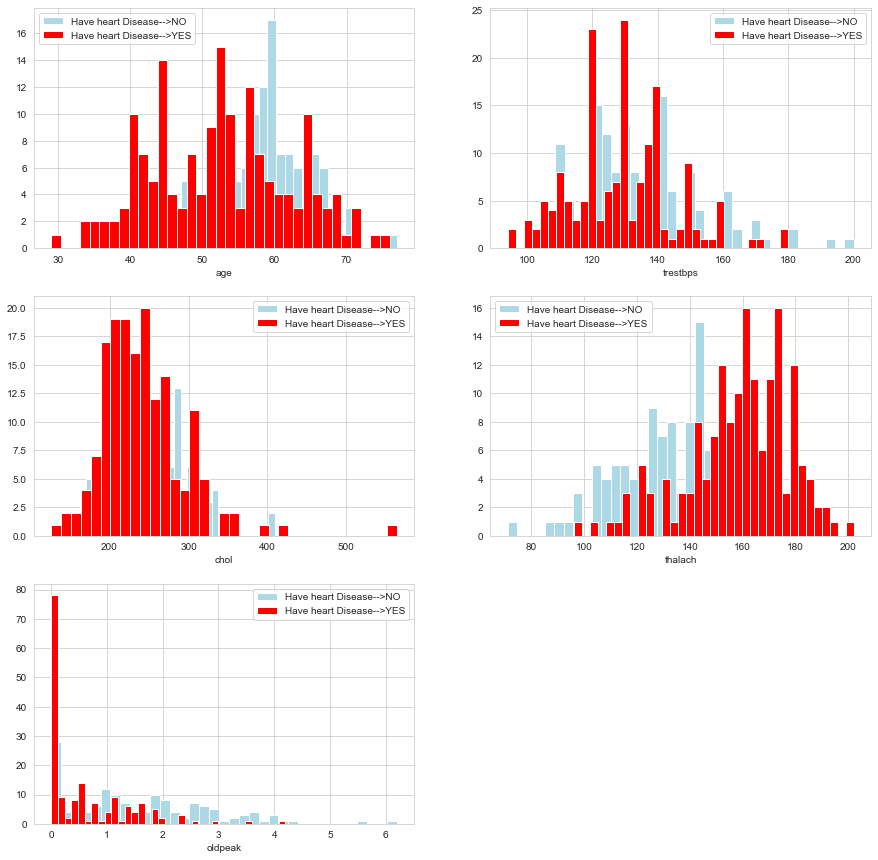

In [11]:
#plotting target with continuous variables
plt.figure(figsize=(15, 15))

for i,col in enumerate(continuous, 1):
    plt.subplot(3,2,i)
    df[df['target']==0][col].hist(bins=35,color='lightblue',label='Have heart Disease-->NO')
    df[df['target']==1][col].hist(bins=35,color='red',label='Have heart Disease-->YES')
    plt.legend()
    plt.xlabel(col)

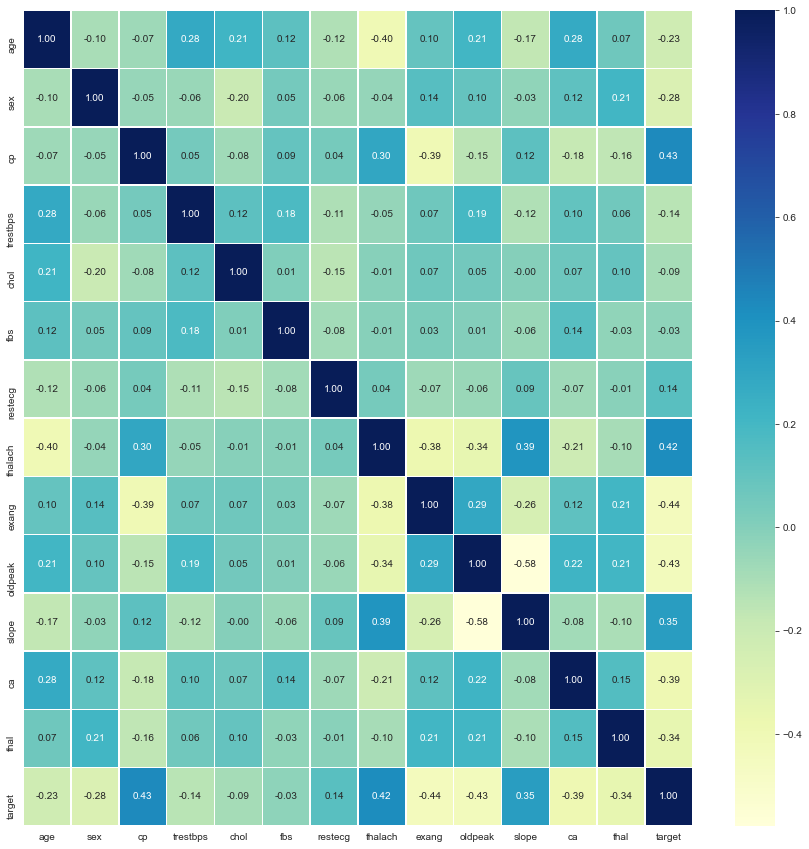

In [12]:
#correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

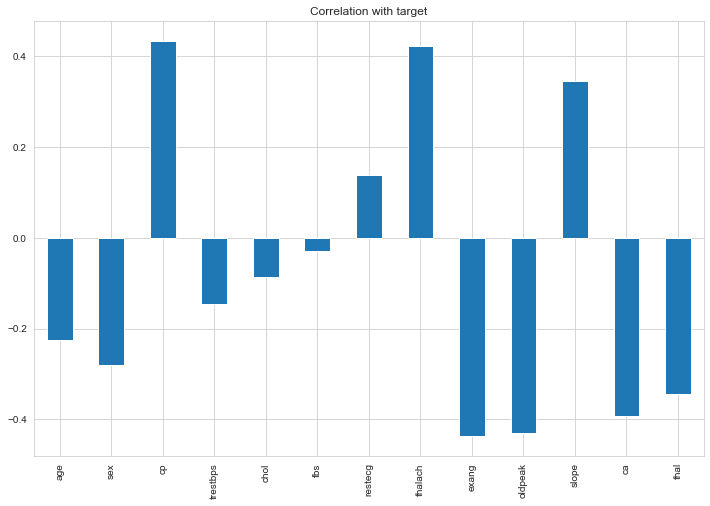

In [13]:
#correlation with target
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True,
                                                   figsize=(12, 8),title="Correlation with target")

In [14]:
#converting categorical cols in dummies and scale them
categorical.remove('target')
dataset = pd.get_dummies(df, columns=categorical)

In [15]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [41]:
dataset.shape

(303, 31)

In [16]:
#test-train-split
from sklearn.model_selection import train_test_split
y = dataset.target
x = dataset.drop('target', axis = 1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
cols_to_scale = ['age','trestbps','chol','thalach','oldpeak']
#dataset[cols_to_scale] = sc.fit_transform(dataset[cols_to_scale])

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train[cols_to_scale]=sc.fit_transform(X_train[cols_to_scale])
#X_train=pd.DataFrame(X_train,columns=X_test.columns)

X_test[cols_to_scale]=sc.transform(X_test[cols_to_scale])
#X_test=pd.DataFrame(X_test,columns=X_train.columns)

#applying machine learning algorithms
Since we can see that the algorithm is not much complex , hence we will apply following ml algos:
    1)Logistic Regression
    2)Decision Tree
    3)Random Forest
    4)KNearest Neighbors

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [20]:
#results_df = pd.DataFrame(columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = []

In [25]:
#result function:

plt.figure(figsize=(15, 15))
count = 0
train_score = 0
test_score = 0
def scores(clf, X_train, y_train, X_test, y_test):
    count = 1
    pred = clf.predict(X_train)
    clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
    train_score = accuracy_score(y_train, pred) * 100
    print("Train Result:\n================================================")
    print(f"Training Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    plt.subplot(2,2,count)
    plt.title('Training Confusion matrix')
    conf_matrix = confusion_matrix(y_train,pred)
    sns.heatmap(conf_matrix, annot=True, fmt=".2f")
    count = 2
    pred = clf.predict(X_test)
    clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
    test_score = accuracy_score(y_test, pred) * 100
    print("Test Result:\n================================================")        
    print(f"Testing Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
    roc_auc = roc_auc_score(y_test, pred)
    plt.subplot(2,2,count)
    plt.title('Testing Confusion matrix')
    conftest_matrix = confusion_matrix(y_test,pred)
    sns.heatmap(conftest_matrix, annot=True, fmt=".2f")
    results_df.append([clf,train_score,test_score,roc_auc])
    

<Figure size 1080x1080 with 0 Axes>

Train Result:
Training Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.879121    0.859504  0.867925    0.869313      0.868480
recall      0.824742    0.904348  0.867925    0.864545      0.867925
f1-score    0.851064    0.881356  0.867925    0.866210      0.867496
support    97.000000  115.000000  0.867925  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Testing Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.868421   0.849057  0.857143   0.858739      0.857781
recall      0.804878   0.900000  0.857143   0.852439      0.857143
f1-score    0.835443   0.873786  0.857143   0.854615      0.856511
support    41.000000  50.000000  0.857143  91.000000     91.000

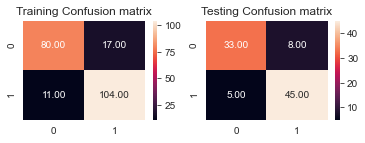

In [26]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
scores(lr, X_train, y_train, X_test, y_test)

Train Result:
Training Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Testing Accuracy Score: 80.22%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.755556   0.847826  0.802198   0.801691      0.806254
recall      0.829268   0.780000  0.802198   0.804634      0.802198
f1-score    0.790698   0.812500  0.802198   0.801599      0.802677
support    41.000000  50.000000  0.802198  91.000000     91.000000
_______________________________________________
Co

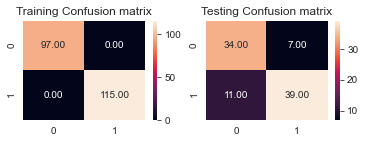

In [27]:
#decision tree
dr = DecisionTreeClassifier()
dr.fit(X_train,y_train)
scores(dr, X_train, y_train, X_test, y_test)

Train Result:
Training Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Testing Accuracy Score: 83.52%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.825000   0.843137  0.835165   0.834069      0.834966
recall      0.804878   0.860000  0.835165   0.832439      0.835165
f1-score    0.814815   0.851485  0.835165   0.833150      0.834963
support    41.000000  50.000000  0.835165  91.000000     91.000000
_______________________________________________
Co

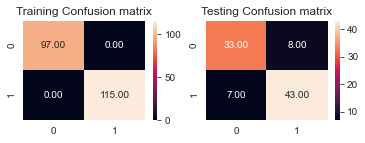

In [28]:
#random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
scores(rf, X_train, y_train, X_test, y_test)

Train Result:
Training Accuracy Score: 87.26%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.872340    0.872881  0.872642    0.872611      0.872634
recall      0.845361    0.895652  0.872642    0.870506      0.872642
f1-score    0.858639    0.884120  0.872642    0.871379      0.872461
support    97.000000  115.000000  0.872642  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 12 103]]

Test Result:
Testing Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.833333   0.877551  0.857143   0.855442      0.857629
recall      0.853659   0.860000  0.857143   0.856829      0.857143
f1-score    0.843373   0.868687  0.857143   0.856030      0.857282
support    41.000000  50.000000  0.857143  91.000000     91.000

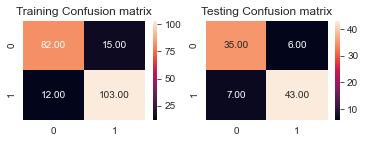

In [29]:
#knn
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
scores(knn, X_train, y_train, X_test, y_test)

Train Result:
Training Accuracy Score: 98.58%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.989583    0.982759  0.985849    0.986171      0.985881
recall      0.979381    0.991304  0.985849    0.985343      0.985849
f1-score    0.984456    0.987013  0.985849    0.985734      0.985843
support    97.000000  115.000000  0.985849  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 95   2]
 [  1 114]]

Test Result:
Testing Accuracy Score: 83.52%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.809524   0.857143  0.835165   0.833333      0.835688
recall      0.829268   0.840000  0.835165   0.834634      0.835165
f1-score    0.819277   0.848485  0.835165   0.833881      0.835325
support    41.000000  50.000000  0.835165  91.000000     91.000

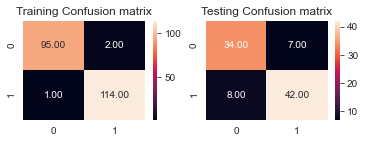

In [37]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

scores(xgb_clf, X_train, y_train, X_test, y_test)

In [39]:
results = pd.DataFrame(results_df, columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','ROC_AUC_Score'])

In [40]:
results

,Model,Training Accuracy %,Testing Accuracy %,ROC_AUC_Score
0,LogisticRegression(),86.792453,85.714286,0.852439
1,DecisionTreeClassifier(),100.000000,80.219780,0.804634
2,"(DecisionTreeClassifier(max_features='auto', r...",100.000000,83.516484,0.832439
3,KNeighborsClassifier(),87.264151,85.714286,0.856829
4,"GridSearchCV(cv=10, estimator=KNeighborsClassi...",90.094340,84.615385,0.842439
5,XGBClassifier(),98.584906,83.516484,0.834634


In [35]:
#Hyper parameter tuning


model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)

#Learning
model1.fit(X_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

#Prediction
prediction=model1.predict(X_test)

#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
#roc_auc_score
print("ROC-AUC-Score:\n",metrics.roc_auc_score(prediction,y_test))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 8, 'weights': 'distance'}
Accuracy: 0.8901098901098901
Confusion Matrix:
 [[34  3]
 [ 7 47]]
ROC-AUC-Score:
 0.8946446446446445
